In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/binary_featm_cicids.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#results storage and save function
results = {}



In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


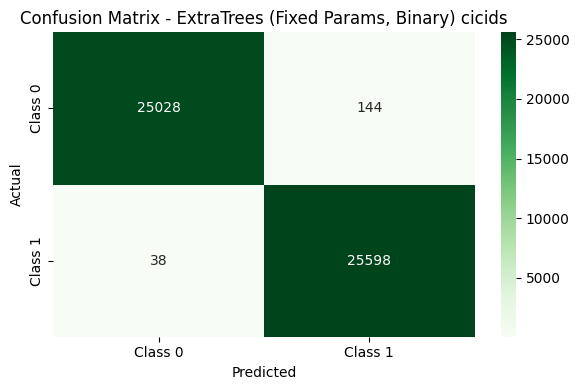

{'Accuracy': 0.9964178869469374, 'Precision': 0.9944060290575713, 'Recall': 0.9985177094710563, 'F1 Score': 0.9964576277784266, 'False Positives': np.int64(144), 'Time Taken (s)': 18.1164}


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Encode labels for binary
le = LabelEncoder()
y_encoded = le.fit_transform(y)
n_classes = len(le.classes_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define and train model with fixed hyperparameters
n_estimators = 100
max_depth = 30

start_time = time.time()

model = ExtraTreesClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics for binary classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
cm = confusion_matrix(y_test, y_pred)
false_positives = cm[0][1]

# Save results
results["ExtraTrees"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ExtraTrees (Fixed Params, Binary) cicids")
plt.tight_layout()
plt.savefig("confusion_matrix_extratrees_fixed_binary_cicids.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["ExtraTrees"])


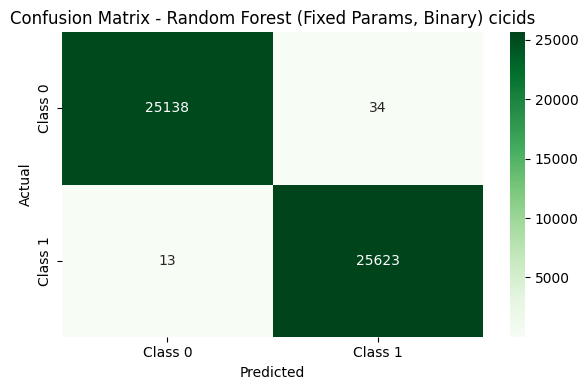

{'Accuracy': 0.9990749488269564, 'Precision': 0.9986748255836614, 'Recall': 0.9994929006085193, 'F1 Score': 0.9990836956309828, 'False Positives': np.int64(34), 'Time Taken (s)': 39.9422}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fixed hyperparameters
n_estimators = 93
max_depth = 20

# Timing
start_time = time.time()

# Train model
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics for binary classification
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='binary')
recall = recall_score(y_test, y_pred_rf, average='binary')
f1 = f1_score(y_test, y_pred_rf, average='binary')
cm = confusion_matrix(y_test, y_pred_rf)
false_positives = cm[0][1]

# Save results
results["RandomForest"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Fixed Params, Binary) cicids")
plt.tight_layout()
plt.savefig("confusion_matrix_rf_fixed_binary_cicids.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["RandomForest"])


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


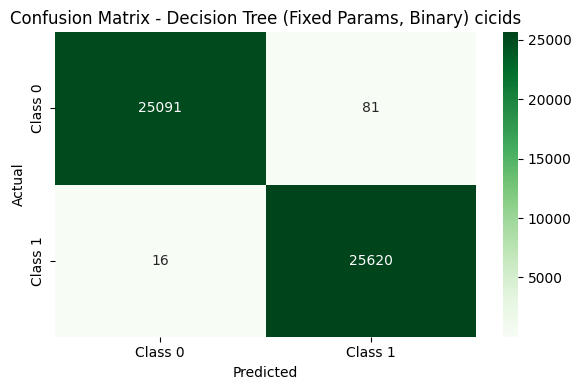

{'Accuracy': 0.9980908518343568, 'Precision': 0.9968483716586903, 'Recall': 0.9993758776720237, 'F1 Score': 0.9981105245729202, 'False Positives': np.int64(81), 'Time Taken (s)': 5.4122}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fixed hyperparameters
max_depth = 15
min_samples_split = 9

# Timing
start_time = time.time()

# Train model
model = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42
)
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics for binary classification
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='binary')
recall = recall_score(y_test, y_pred_dt, average='binary')
f1 = f1_score(y_test, y_pred_dt, average='binary')
cm = confusion_matrix(y_test, y_pred_dt)
false_positives = cm[0][1]

# Save results
results["DecisionTree"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (Fixed Params, Binary) cicids")
plt.tight_layout()
plt.savefig("confusion_matrix_dt_fixed_binary_cicids.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["DecisionTree"])


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/binary_featm_cicids.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score





In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=00b80acd269f23b6fe91a011df5ba98b9012f29667806688e2bd17c46a324c45
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:44:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


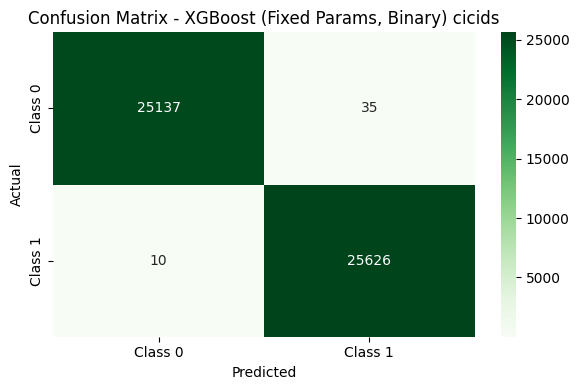

{'Accuracy': 0.9991143127066604, 'Precision': 0.9986360625073069, 'Recall': 0.9996099235450149, 'F1 Score': 0.9991227557167086, 'False Positives': np.int64(35), 'Time Taken (s)': 15.7489}


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Encode labels for binary classification
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fixed hyperparameters
n_estimators = 155
max_depth = 7
learning_rate = 0.1672

# Timing
start_time = time.time()

# Train model
model = XGBClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    learning_rate=learning_rate,
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
cm = confusion_matrix(y_test, y_pred)
false_positives = cm[0][1]

# Save results
results["XGBoost"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost (Fixed Params, Binary) cicids")
plt.tight_layout()
plt.savefig("confusion_matrix_xgboost_fixed_binary_cicids.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["XGBoost"])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 101383, number of negative: 101847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4992
[LightGBM] [Info] Number of data points in the train set: 203230, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498858 -> initscore=-0.004566
[LightGBM] [Info] Start training from score -0.004566


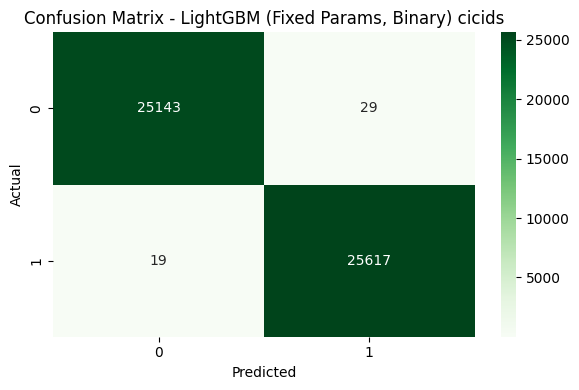

{'Accuracy': 0.9990552668871044, 'Precision': 0.9988692193714419, 'Recall': 0.9992588547355281, 'F1 Score': 0.999063999063999, 'False Positives': np.int64(29), 'Time Taken (s)': 24.4798}


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fixed hyperparameters
n_estimators = 196
num_leaves = 52
learning_rate = 0.1325

# Timing
start_time = time.time()

# Train model
model = LGBMClassifier(
    n_estimators=n_estimators,
    num_leaves=num_leaves,
    learning_rate=learning_rate,
    objective='binary',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred_lgbm = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm, average='binary')
recall = recall_score(y_test, y_pred_lgbm, average='binary')
f1 = f1_score(y_test, y_pred_lgbm, average='binary')
cm = confusion_matrix(y_test, y_pred_lgbm)
false_positives = cm[0][1]

# Save results
results["LightGBM"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion Matrix
class_labels = np.unique(y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM (Fixed Params, Binary) cicids")
plt.tight_layout()
plt.savefig("confusion_matrix_lightgbm_fixed_binary_cicids.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["LightGBM"])


In [ ]:
!pip install catboost

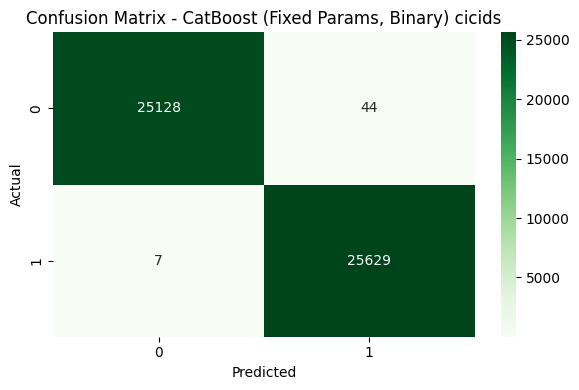

{'Accuracy': 0.9989962210675484, 'Precision': 0.9982861371869279, 'Recall': 0.9997269464815104, 'F1 Score': 0.9990060223352628, 'False Positives': np.int64(44), 'Time Taken (s)': 31.4659}


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fixed hyperparameters
iterations = 167
depth = 8
learning_rate = 0.1299

# Timing
start_time = time.time()

# Train model
model = CatBoostClassifier(
    iterations=iterations,
    depth=depth,
    learning_rate=learning_rate,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)
y_pred_cat = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred_cat)
precision = precision_score(y_test, y_pred_cat, average='binary')
recall = recall_score(y_test, y_pred_cat, average='binary')
f1 = f1_score(y_test, y_pred_cat, average='binary')
cm = confusion_matrix(y_test, y_pred_cat)
false_positives = cm[0][1]

# Save results
results["CatBoost"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "False Positives": false_positives,
    "Time Taken (s)": round(execution_time, 4)
}

# Confusion matrix
class_labels = np.unique(y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost (Fixed Params, Binary) cicids")
plt.tight_layout()
plt.savefig("confusion_matrix_catboost_fixed_binary_cicids.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["CatBoost"])


In [ ]:
print(results)

{'ExtraTrees': {'Accuracy': 0.9964178869469374, 'Precision': 0.9944060290575713, 'Recall': 0.9985177094710563, 'F1 Score': 0.9964576277784266, 'False Positives': np.int64(144), 'Time Taken (s)': 18.1164}, 'RandomForest': {'Accuracy': 0.9990749488269564, 'Precision': 0.9986748255836614, 'Recall': 0.9994929006085193, 'F1 Score': 0.9990836956309828, 'False Positives': np.int64(34), 'Time Taken (s)': 39.9422}, 'DecisionTree': {'Accuracy': 0.9980908518343568, 'Precision': 0.9968483716586903, 'Recall': 0.9993758776720237, 'F1 Score': 0.9981105245729202, 'False Positives': np.int64(81), 'Time Taken (s)': 5.4122}, 'XGBoost': {'Accuracy': 0.9991143127066604, 'Precision': 0.9986360625073069, 'Recall': 0.9996099235450149, 'F1 Score': 0.9991227557167086, 'False Positives': np.int64(35), 'Time Taken (s)': 15.7489}, 'LightGBM': {'Accuracy': 0.9990552668871044, 'Precision': 0.9988692193714419, 'Recall': 0.9992588547355281, 'F1 Score': 0.999063999063999, 'False Positives': np.int64(29), 'Time Taken (s

# **Comparison**

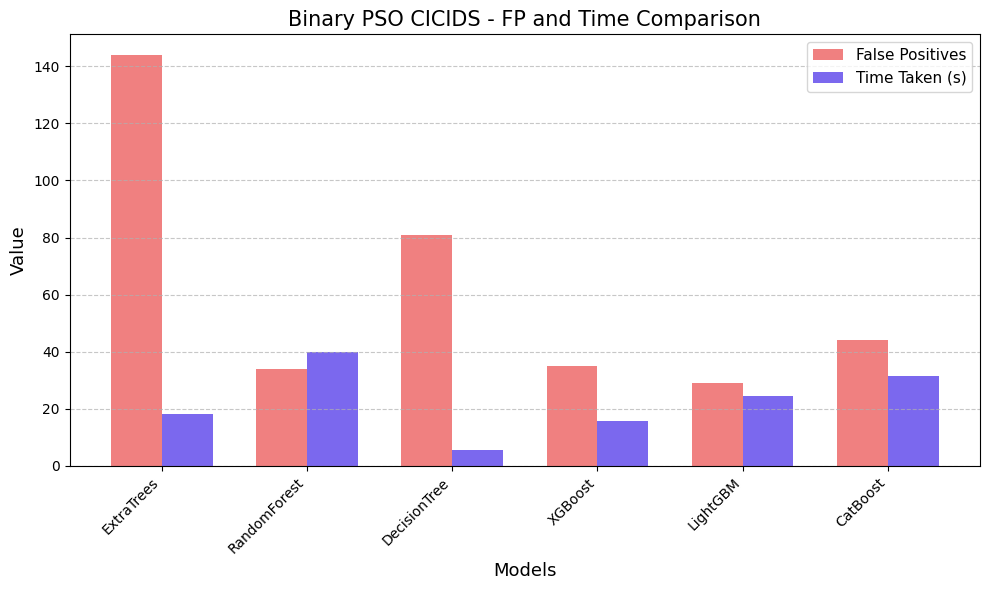

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract models and their metrics
models = list(results.keys())
false_positives = [results[model]["False Positives"] for model in models]
time_taken = [results[model]["Time Taken (s)"] for model in models]


x = np.arange(len(models))
width = 0.35

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, false_positives, width=width, label='False Positives', color='lightcoral')
plt.bar(x + width/2, time_taken, width=width, label='Time Taken (s)', color='mediumslateblue')


plt.xlabel('Models', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.title('Binary PSO CICIDS - FP and Time Comparison', fontsize=15)
plt.xticks(x, models, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show
plt.tight_layout()
plt.savefig("binary_pso_cicids_fp_time_comparison.png", dpi=800)
plt.show()
